## Initialising model and libraries

In [38]:
import sys
sys.path.append('../')
from fit.datamodules.super_res import MNIST_SResFITDM, CelebA_SResFITDM,BioSRMicrotubules
from fit.utils.tomo_utils import get_polar_rfft_coords_2D

from fit.modules.SResTransformerModule import SResTransformerModule

from matplotlib import pyplot as plt
from matplotlib import gridspec
from fit.utils.PSNR import RangeInvariantPsnr as PSNR
# from fit.utils.utils import PSNR
import torch
import numpy as np
from pytorch_lightning import seed_everything

import seaborn as sns
import matplotlib.pyplot as plt


# trained_model_path = '/home/aman.kukde/Projects/FourierImageTransformer/models/CelebA/fast/sum/Fast_CelebA_sum__wp_1000_L_8_H_8_s_5_subset_False_08-04_18-18-18/epoch=241-step=605000.ckpt'

# dataset = trained_model_path.split('/')[-5]
# model_type = trained_model_path.split('/')[-4]
# loss = trained_model_path.split('/')[-3]
dataset = "Microtubules"
model_type = 'mamba'
loss = 'prod'

seed_everything(22122020)

if dataset == "MNIST":
    dm = MNIST_SResFITDM(root_dir="./datamodules/data/",
                            batch_size=32, subset_flag=False)
if dataset == "CelebA":
    dm = CelebA_SResFITDM(root_dir="./datamodules/data/",
                            batch_size=8, subset_flag=False)
if dataset == "Microtubules":
    dm = BioSRMicrotubules('./', 8)
# dm = BioSRMicrotubules('./', 8)
dm.prepare_data()
dm.setup()
r, phi, flatten_order, order = get_polar_rfft_coords_2D(img_shape=dm.gt_shape)
n_heads = 8
d_query = 32
model = SResTransformerModule(img_shape=dm.gt_shape,
                              coords=(r, phi),
                              dst_flatten_order=flatten_order,
                              dst_order=order,
                              loss=loss,
                              lr=0.0001, weight_decay=0.01, n_layers=8,
                              n_heads=n_heads, d_query=d_query,num_shells = 12,
                              model_type = model_type)


# weights = torch.load(trained_model_path)['state_dict']
# model.load_state_dict(weights, strict=True)
# model.cuda()
# model.eval()

# print('Model Loaded')

Seed set to 22122020


torch.Size([5500, 99, 99])


In [48]:
model.input_seq_length

222

torch.Size([8, 4950, 2])


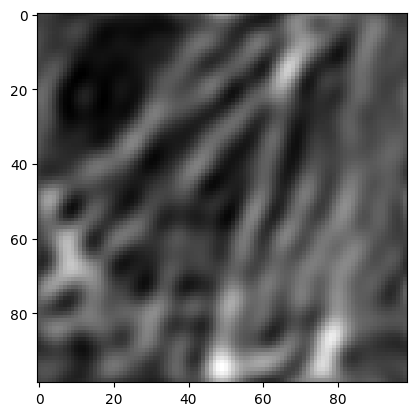

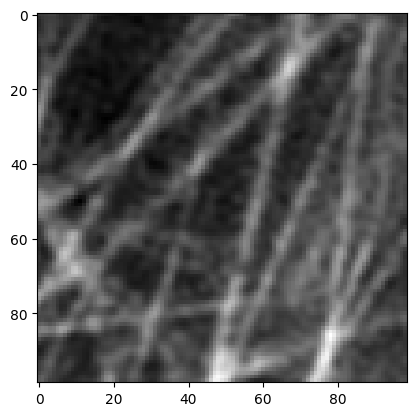

In [49]:
for fc, (mag_min, mag_max) in dm.train_dataloader():
        break
fc = fc.to('cuda')
mag_min = mag_min.to('cuda')
mag_max = mag_max.to('cuda')
gt = fc[:, flatten_order]
print(fc.shape)

isl = 222
fig = plt.figure()
lowres = torch.zeros_like(fc)
# lowres+=fc.min()
lowres[:, :isl] = gt[:,:isl]

lowres_img = model.convert2img(fc=lowres, mag_min=mag_min, mag_max=mag_max)
gt_img = model.convert2img(fc=gt, mag_min=mag_min, mag_max=mag_max)
gt_img = gt_img.cpu().detach().numpy()
lowres_img = lowres_img.cpu().detach().numpy()
plt.imshow(lowres_img[-1], cmap='gray');plt.show()
plt.imshow(gt_img[-1], cmap='gray')

In [34]:
gt_img[0,:50,:50].sum()

nan

In [45]:
data.shape

(100, 100, 100)

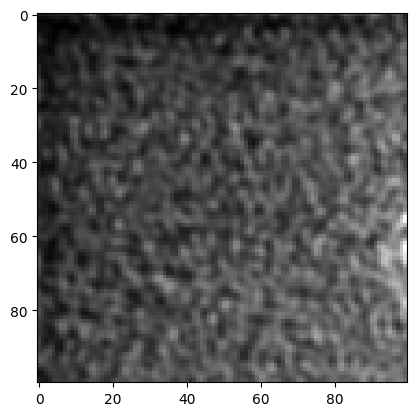

-9147.1016

In [17]:
x = -1000
plt.imshow(gt_img[0,x:x+100,x:x+100], cmap='gray')
plt.show()
gt_img[0,x:x+100,x:x+100].sum()

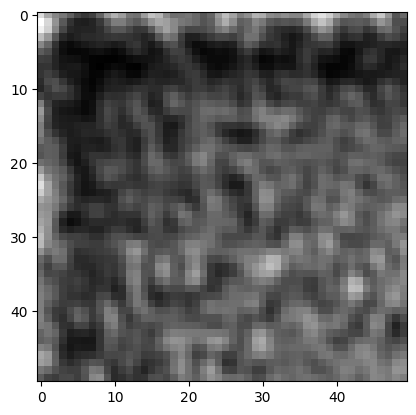

In [29]:
plt.imshow(gt_img[0,:50,:50], cmap='gray')

In [ ]:
# img = torch.zeros([9,9,3])
# points = np.stack(np.indices([9,9])).reshape(2,-1)

# blue = (0,0,1)
# red = (1,0,0)
# orange = (1,1/2,0)
# green = (0,1,0)

# angles = [0,45,225,280]
# origions = np.array([(4,4),(4,4),(4,4),(4,4)])
# colors = [blue, red, orange, green]

# def angle_from(p):
#     return np.rad2deg(np.arctan2(*(points-p.reshape(2,1)))) % 360

# def set_color(angle, origin, color):
#     angles = angle_from(np.array(origin))
#     mask = angles - angle == 0
#     img.view(-1,3)[np.where(mask),:] = torch.tensor(color, dtype=torch.float)

# for angle, origin, color in zip(angles,origions,colors):
#     set_color(angle, origin, color)
#     rad = np.deg2rad(angle)
#     x = (origin[0],origin[1]+10*np.cos(rad))
#     y = (origin[0],origin[1]+10*np.sin(rad))
#     plt.plot(x, y, c='white')
    
# angle = 280
# rad = np.deg2rad(angle)

# plt.scatter(*points)
# plt.imshow(img, origin='lower')

<Figure size 640x480 with 0 Axes>

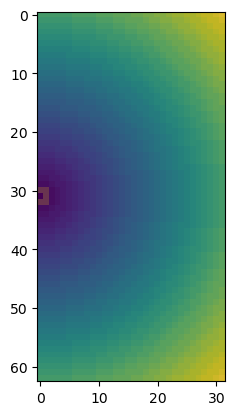

In [2]:

x, y = np.meshgrid(range(model.dft_shape[1]), range(-model.dft_shape[0] // 2 + 1, model.dft_shape[0] // 2 + 1))
radii = np.sqrt(x ** 2 + y ** 2, dtype=np.float32)
# selected_rings = np.round(radii) < num_rings
radii_disc = np.round(radii)
ims = []
fig = plt.figure()
# for n in range(30):
for n in range(1):
    fig = plt.figure()
    plt.imshow(radii_disc, interpolation='none')
    selected_rings = (radii_disc >= n) & (radii_disc <=n+1)
    r = radii_disc.copy()
    r[~selected_rings] = n
    im = plt.imshow(r,alpha = 0.2)
    # plt.savefig(f'/home/aman.kukde/Projects/FourierImageTransformer/presentation/output_{n}.png')
    # plt.close()


In [ ]:
from fit.utils import read_mrc
import matplotlib.pyplot as plt
import os
import torch
from torchvision.transforms.functional import resize
from torchvision.io import read_image
from tqdm import tqdm

In [ ]:
image_folder_path = '/group/jug/Aman/Omniglot/'
import glob
images = torch.tensor([])
for image_path in tqdm(glob.iglob(image_folder_path + '**/*.png', recursive=True)):
    images = torch.cat([images,read_image(image_path)])
print(images.shape)

0it [00:00, ?it/s]

32460it [32:22, 16.71it/s]

torch.Size([32460, 105, 105])


In [ ]:
torch.save(images,'./Omniglot.pt')

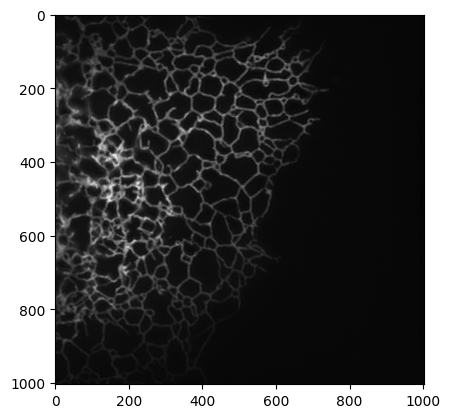

In [38]:
imgs = read_mrc.read_mrc('/group/jug/ashesh/data/BioSR/ER/GT_all.mrc')[1]
imgs = torch.permute(torch.from_numpy(imgs).type(torch.float32),(2,0,1))
# images = resize(imgs, (129, 129),interpolation=0)
plt.imshow(imgs[0],cmap = 'gray')
# plt.imshow(imgs[4,500:629,500:629],cmap = 'gray')


In [ ]:
d_model = 32*2
from transformers import MambaConfig,MambaModel
conf = MambaConfig()
conf.num_hidden_layers = 24
conf.hidden_size = d_model
conf.intermediate_size = d_model*4
encoder = MambaModel(conf)

sum(p.numel() for p in encoder.parameters())/1000000

5.326912

In [2]:
for fc, (mag_min, mag_max) in dm.train_dataloader():
       break

In [ ]:
fc.shape

torch.Size([8, 2016, 2])

In [ ]:
a.shape

torch.Size([8, 2016])

Model Input Seq Length: 222


torch.Size([2016, 2])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


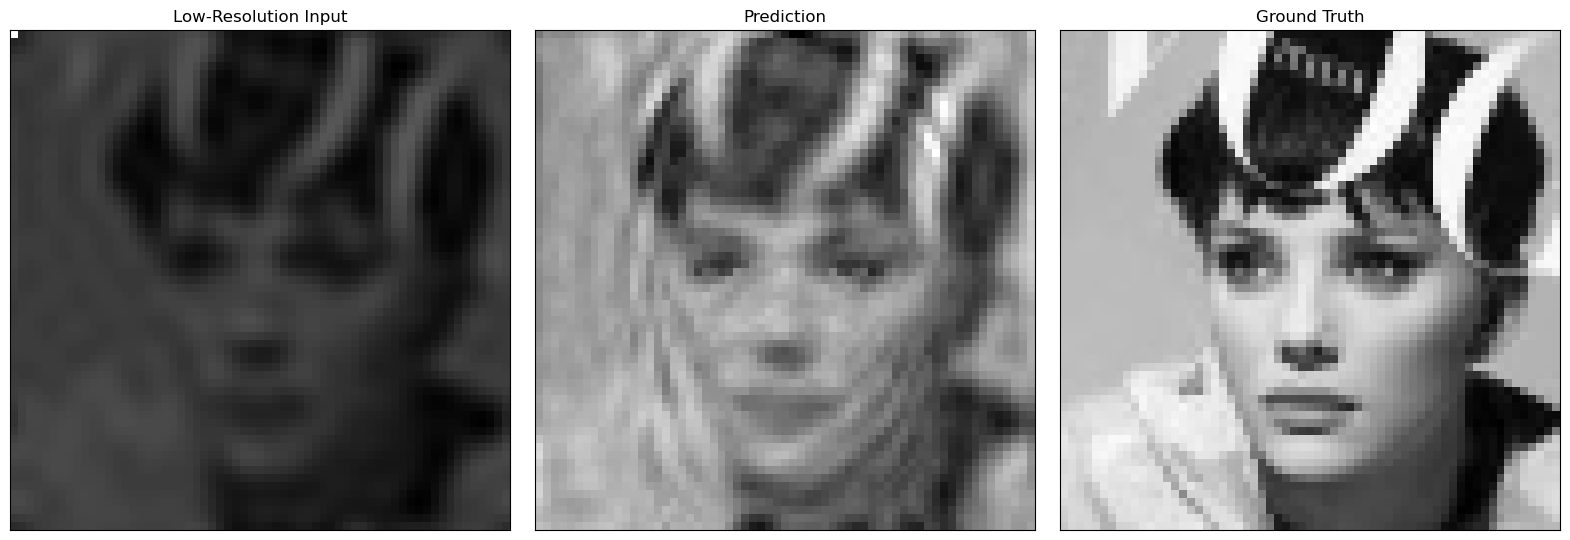

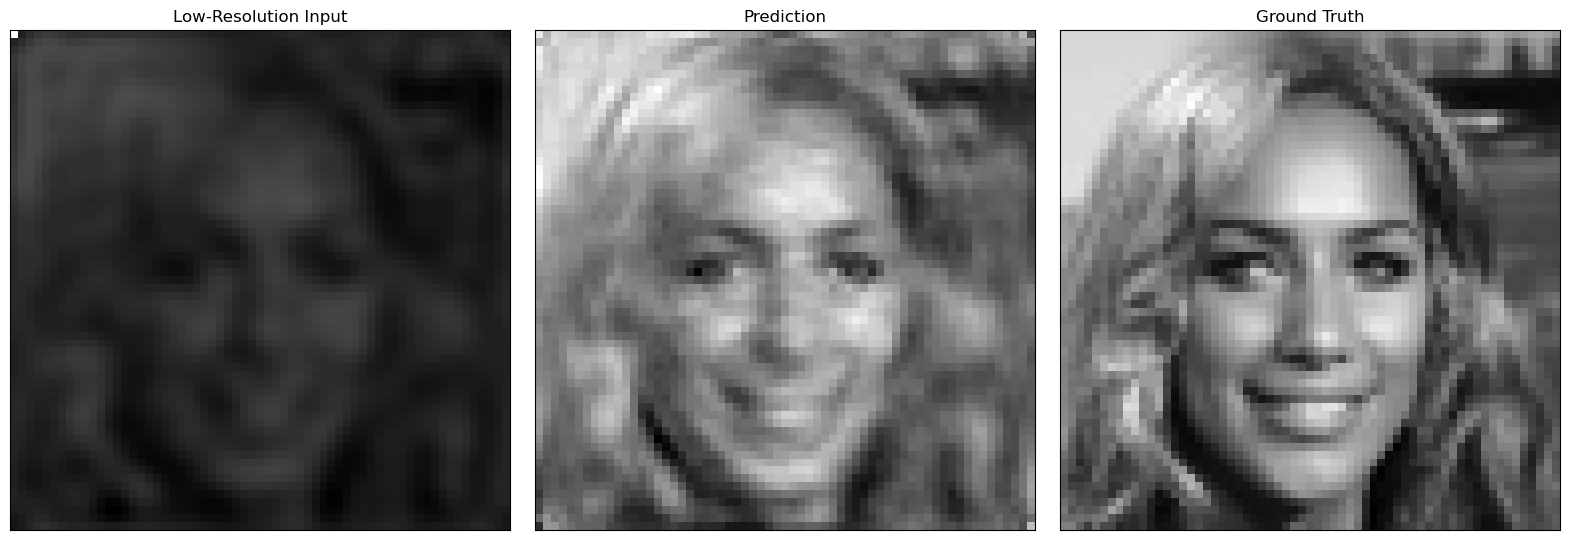

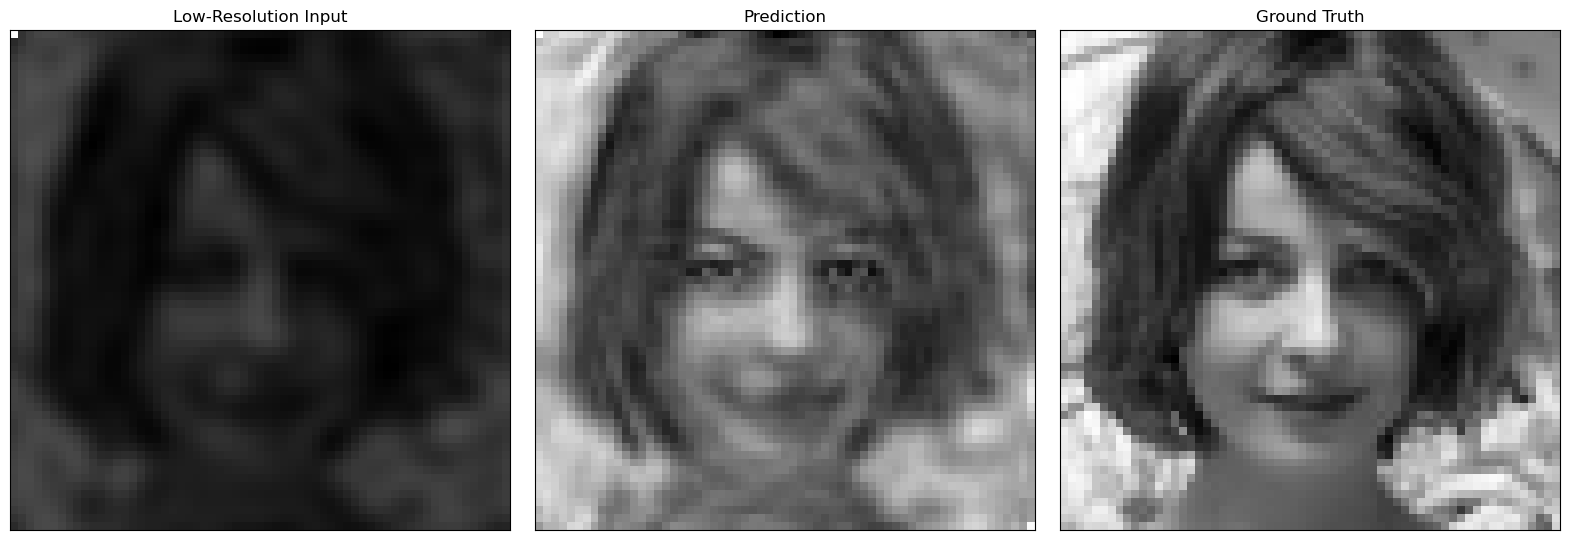

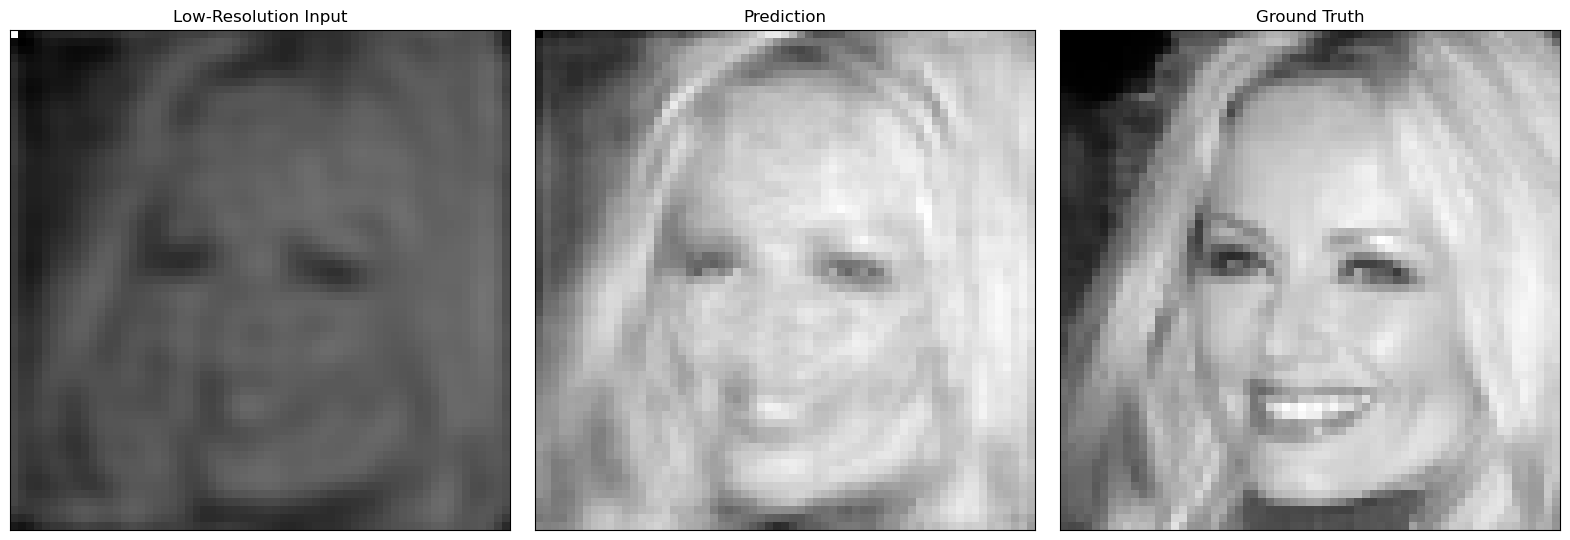

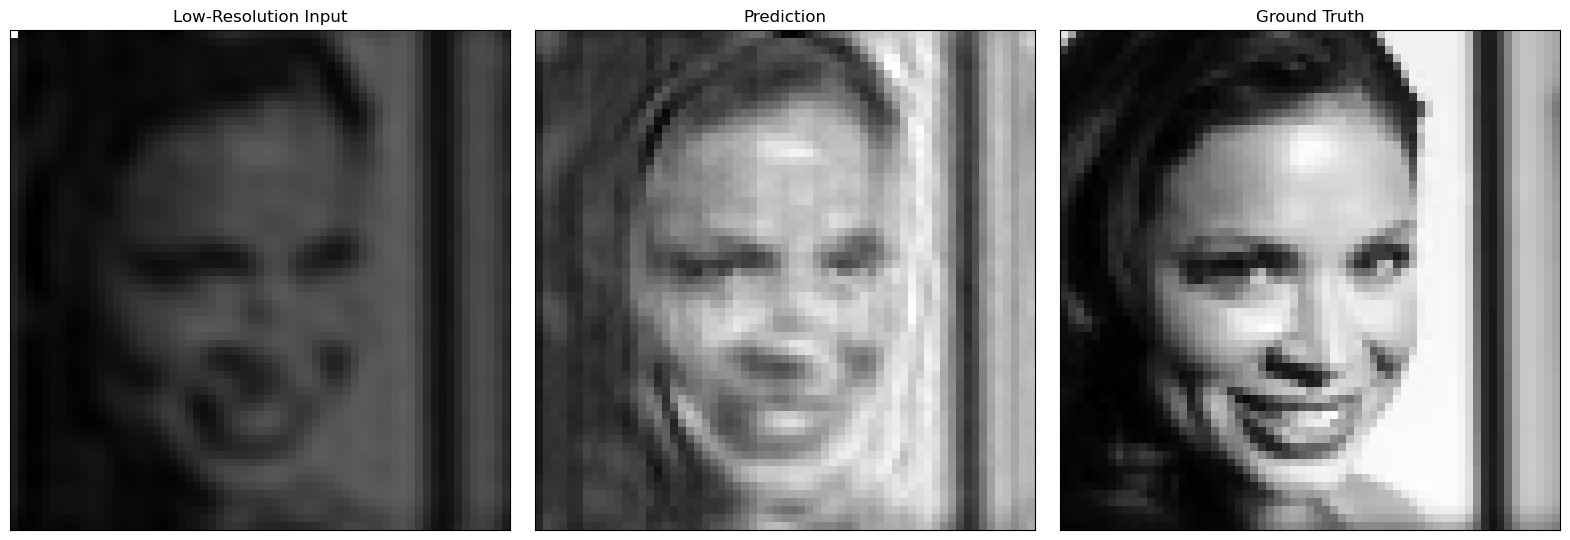

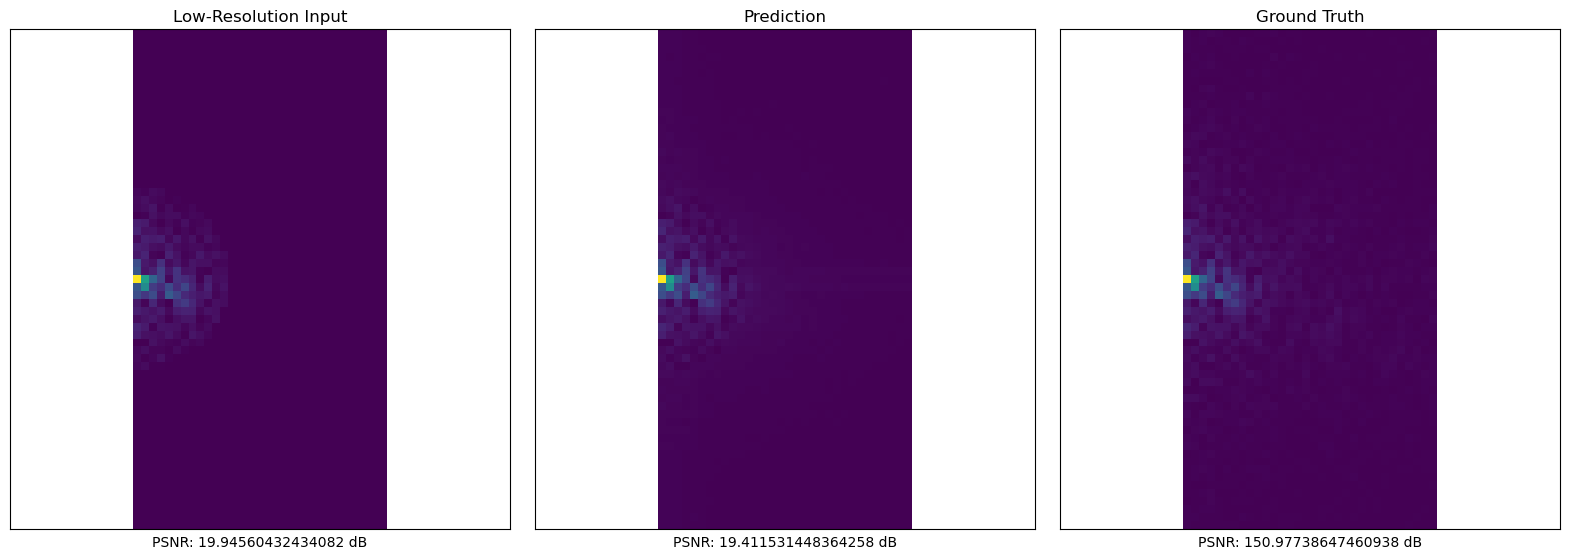

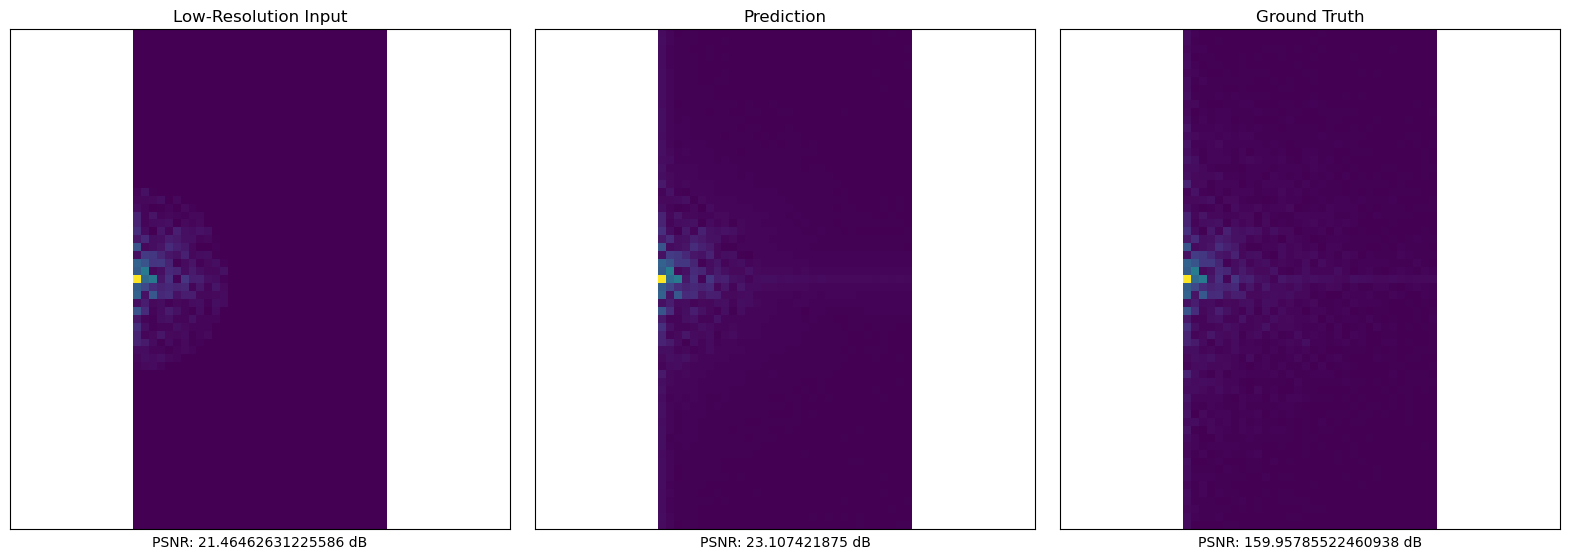

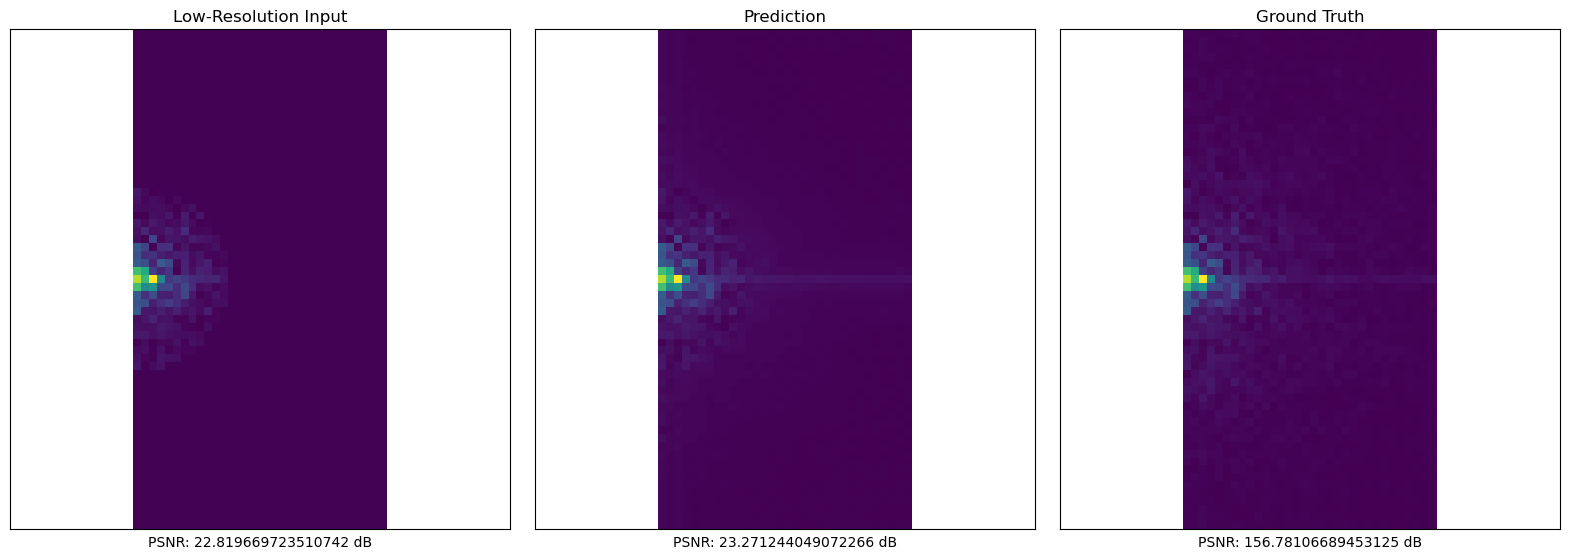

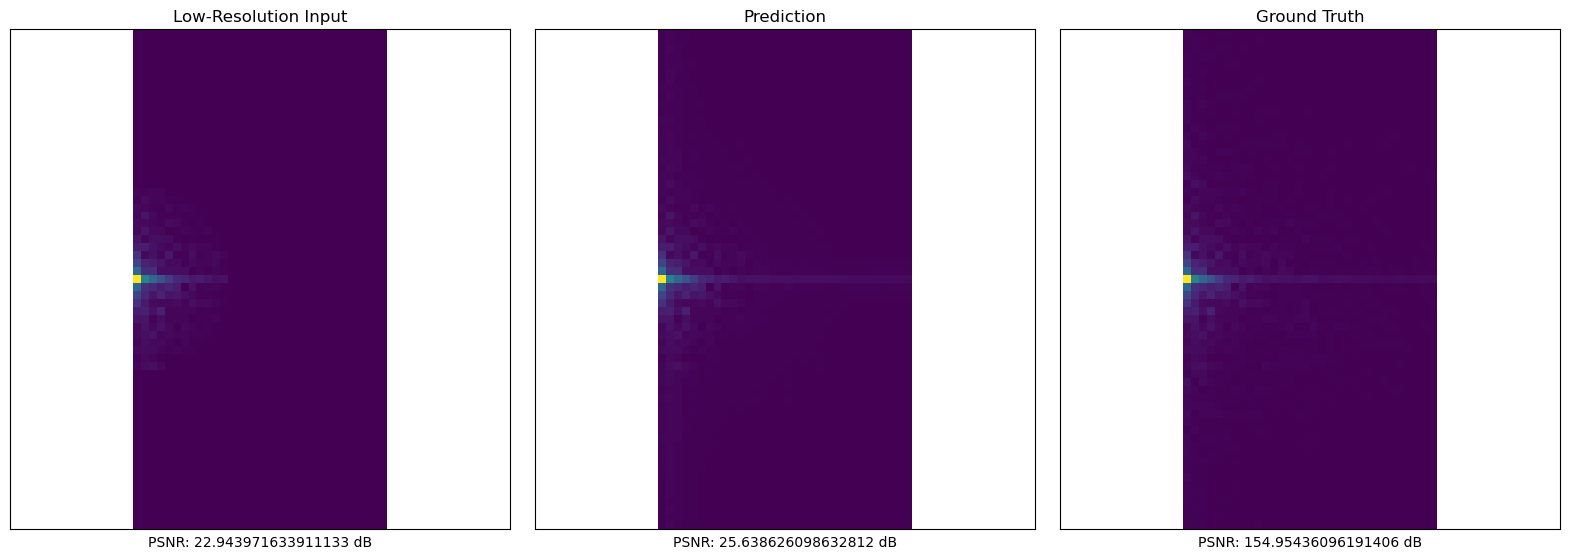

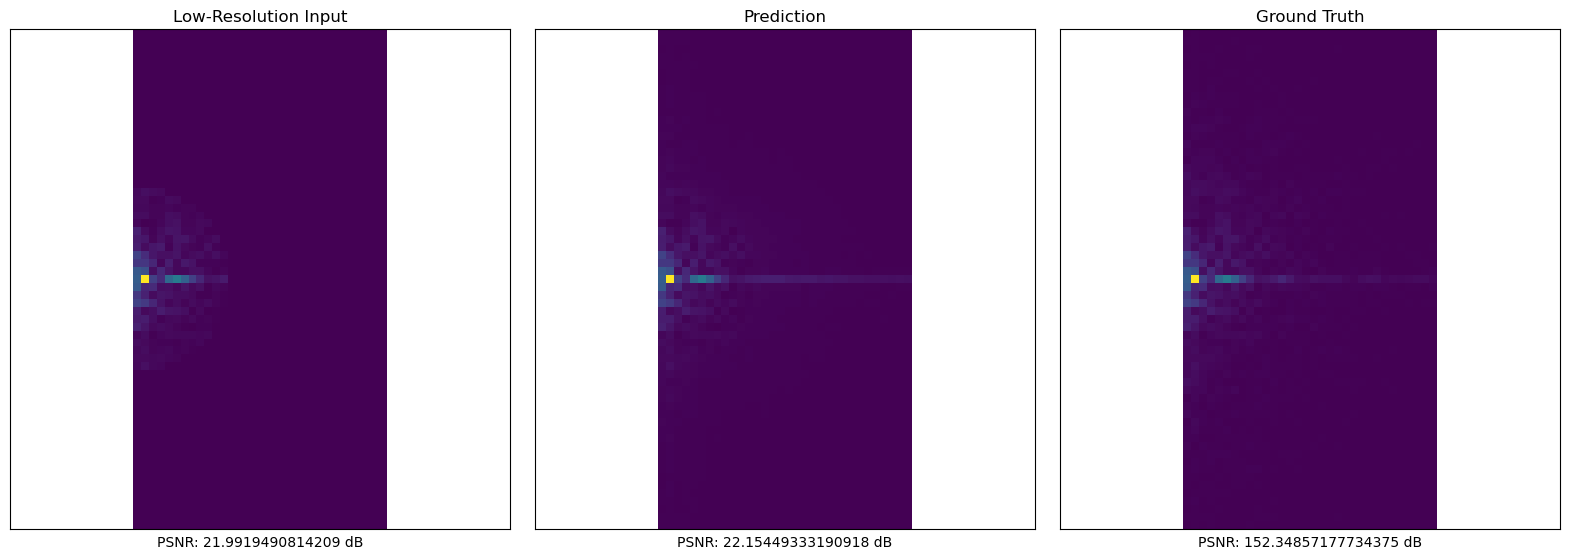

In [2]:
def predict_one_test_batch(no_of_images = 5):
    for fc, (mag_min, mag_max) in dm.test_dataloader():
        break

    fc = fc.to('cuda')
    mag_min = mag_min.to('cuda')
    mag_max = mag_max.to('cuda')
    x_input = fc[:, flatten_order][:, :model.input_seq_length]
    print("Model Input Seq Length:",model.input_seq_length)
    gt = fc[:, flatten_order]

    with torch.no_grad():
        pred = model.sres.forward_inference(x_input,max_seq_length=gt.shape[1])
    # pred[:,:,1] = gt[:,:,1]
        
    fig = plt.figure()
    lowres = torch.zeros_like(pred)
    lowres[:, :model.input_seq_length] = x_input
    pred_img = model.convert2img(fc=pred, mag_min=mag_min, mag_max=mag_max)
    lowres_img = model.convert2img(fc=lowres, mag_min=mag_min, mag_max=mag_max)
    gt_img = model.convert2img(fc=fc[:, model.dst_flatten_order], mag_min=mag_min, mag_max=mag_max)



    lowres_psnr = PSNR(gt_img,lowres_img)
    pred_psnr = PSNR(gt_img,pred_img)
    gt_psnr = PSNR(gt_img,gt_img)

    sns.histplot(pred_psnr.cpu().detach() - lowres_psnr.cpu().detach(), kde=True, color='green', legend= True )
    fig.legend()
    plt.savefig('psnr_diff.png')
    plt.close()
    for i in [pred_img, lowres_img, gt_img]:
        i.cpu().detach().numpy()
    for sample in range(no_of_images):
        fig2 = plt.figure(figsize=(31/2., 10/2.))
        gs = gridspec.GridSpec(1,5, width_ratios=[10,0.5, 10, 0.5, 10])
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)

        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        ax0.imshow(lowres_img[sample].cpu(), cmap='gray')
        ax0.set_title('Low-Resolution Input');
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(pred_img[sample].cpu(), cmap='gray')
        ax1.set_title('Prediction');
        ax1.axis('equal');


        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(gt_img[sample].cpu(), cmap='gray')
        ax2.set_title('Ground Truth');
        ax2.axis('equal');

    from sklearn.random_projection import sample_without_replacement


    for i in range(no_of_images):
        sample = i
        fig = plt.figure(figsize=(31/2., 10/2.))
        gs = gridspec.GridSpec(1, 5, width_ratios=[10,0.5, 10, 0.5, 10])
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[2])
        ax2 = plt.subplot(gs[4])
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
                            hspace = 0, wspace = 0)
        ax0.xaxis.set_major_locator(plt.NullLocator())
        ax0.yaxis.set_major_locator(plt.NullLocator())
        lowres_psnr = PSNR(gt_img, lowres_img)
        ax0.imshow(np.roll(abs(torch.fft.rfftn(lowres_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2 ,0))
        ax0.set_title('Low-Resolution Input');
        ax0.set_xlabel(f'PSNR: {lowres_psnr[sample].cpu().detach()} dB')
        ax0.axis('equal');

        ax1.xaxis.set_major_locator(plt.NullLocator())
        ax1.yaxis.set_major_locator(plt.NullLocator())
        ax1.imshow(np.roll(abs(torch.fft.rfftn(pred_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        pred_psnr = PSNR(gt_img, pred_img)
        ax1.set_title('Prediction');
        ax1.set_xlabel(f'PSNR: {pred_psnr[sample].cpu().detach()} dB')
        ax1.axis('equal');

        ax2.xaxis.set_major_locator(plt.NullLocator())
        ax2.yaxis.set_major_locator(plt.NullLocator())
        ax2.imshow(np.roll(abs(torch.fft.rfftn(gt_img[sample].cpu(),dim = [0,1])),model.dft_shape[0] // 2,0))
        ax2.set_title('Ground Truth');
        ax2.set_xlabel(f'PSNR: {gt_psnr[sample].cpu().detach()} dB')
        ax2.axis('equal');

predict_one_test_batch(5)